In [2]:
!pip install -q textblob matplotlib


In [12]:
import pandas as pd

# Sample social media posts
data = {
    'post': [
        "I love the new design of the app!",
        "The update is terrible, it keeps crashing.",
        "Not sure how I feel about the new features.",
        "Best app update ever, everything works smoothly.",
        "I hate the new interface, it's so confusing."
    ]
}

df = pd.DataFrame(data)


In [5]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify polarity: positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['post'].apply(get_sentiment)


In [13]:
!pip install nltk
!pip install vaderSentiment
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sample social media conversations
conversations = [
    "I love this new phone!",
    "This product is terrible.",
    "The customer service is amazing!",
    "I'm so frustrated with this company.",
    "The features are great, but the price is too high."
]

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each conversation
for conversation in conversations:
    sentiment = sia.polarity_scores(conversation)
    print(f"Conversation: {conversation}")
    print(f"  - Positive sentiment: {sentiment['pos']:.2f}")
    print(f"  - Negative sentiment: {sentiment['neg']:.2f}")
    print(f"  - Neutral sentiment: {sentiment['neu']:.2f}")
    print(f"  - Compound sentiment: {sentiment['compound']:.2f}")
    if sentiment['compound'] > 0.05:
        print("  - Overall sentiment: Positive")
    elif sentiment['compound'] < -0.05:
        print("  - Overall sentiment: Negative")
    else:
        print("  - Overall sentiment: Neutral")
    print()


Conversation: I love this new phone!
  - Positive sentiment: 0.60
  - Negative sentiment: 0.00
  - Neutral sentiment: 0.40
  - Compound sentiment: 0.67
  - Overall sentiment: Positive

Conversation: This product is terrible.
  - Positive sentiment: 0.00
  - Negative sentiment: 0.51
  - Neutral sentiment: 0.49
  - Compound sentiment: -0.48
  - Overall sentiment: Negative

Conversation: The customer service is amazing!
  - Positive sentiment: 0.51
  - Negative sentiment: 0.00
  - Neutral sentiment: 0.49
  - Compound sentiment: 0.62
  - Overall sentiment: Positive

Conversation: I'm so frustrated with this company.
  - Positive sentiment: 0.00
  - Negative sentiment: 0.42
  - Neutral sentiment: 0.57
  - Compound sentiment: -0.57
  - Overall sentiment: Negative

Conversation: The features are great, but the price is too high.
  - Positive sentiment: 0.22
  - Negative sentiment: 0.00
  - Neutral sentiment: 0.78
  - Compound sentiment: 0.37
  - Overall sentiment: Positive



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


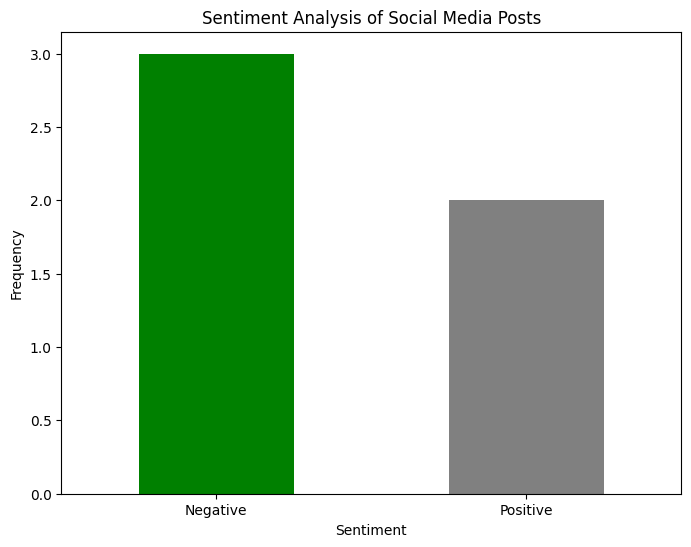

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


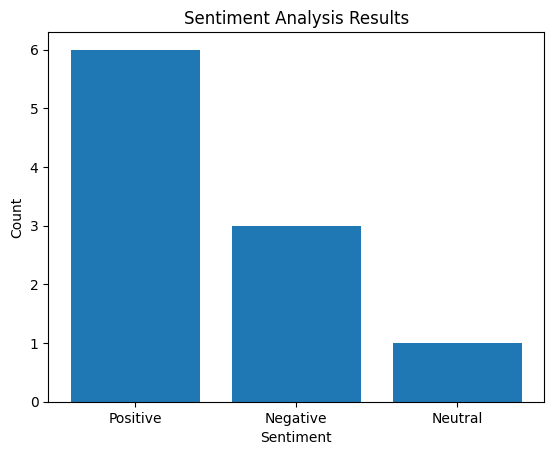

In [9]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sample social media conversations
conversations = [
    "I love this new phone!",
    "This product is terrible.",
    "The customer service is amazing!",
    "I'm so frustrated with this company.",
    "The features are great, but the price is too high.",
    "I'm very happy with this purchase.",
    "The quality is excellent.",
    "The delivery was slow.",
    "The product is okay.",
    "I'm disappointed with the service."
]

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each conversation
positive_count = 0
negative_count = 0
neutral_count = 0
for conversation in conversations:
    sentiment = sia.polarity_scores(conversation)
    if sentiment['compound'] > 0.05:
        positive_count += 1
    elif sentiment['compound'] < -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Create a bar chart
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
plt.bar(labels, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

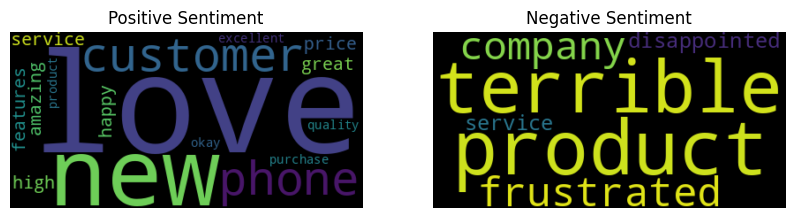

In [11]:
from wordcloud import WordCloud

positive_words = []
negative_words = []
for conversation in conversations:
    sentiment = sia.polarity_scores(conversation)
    if sentiment['compound'] > 0.05:
        positive_words.append(conversation)
    elif sentiment['compound'] < -0.05:
        negative_words.append(conversation)

positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

wordcloud_positive = WordCloud().generate(positive_text)
wordcloud_negative = WordCloud().generate(negative_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()